In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [1]:
import sys
print(sys.executable)

/usr/local/bin/python3


In [3]:
df = pd.read_csv("Housing_Price_Data.csv", delimiter=";")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4.0,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960,4.0,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960,3.0,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500,4.0,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420,4.0,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2.0,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150.0,2400,3.0,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000.0,3620,2.0,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000.0,2910,3.0,1,1,no,no,no,no,no,0,no,furnished


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             542 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          541 non-null    float64
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          543 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB


 Since the "price" column is continuous and numerical, I will replace the missing values with the mean of the column. For the "bedrooms" and "mainroad" columns, which are discrete and categorical, I will replace the missing values with the mode of each respective column.

In [5]:
df['price'] = df['price'].fillna(df['price'].mean())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['mainroad'] = df['mainroad'].fillna(df['mainroad'].mode()[0])

df['price'] = df['price'].fillna(df['price'].mean())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['mainroad'] = df['mainroad'].fillna(df['mainroad'].mode()[0])

In [9]:
df["bedrooms"] = df["bedrooms"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


no empty values

In [5]:
df.duplicated().sum()

np.int64(0)

no duplicated values

In [6]:
object = [col for col in df.columns if df[col].dtype == "object"]
numeric = [col for col in df.select_dtypes("number").columns]
print(object, "\n", numeric)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'] 
 ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [7]:
disc_obj = ["bedrooms", "bathrooms", "stories","parking"] + [col for col in df.columns if df[col].dtype == "object"]
continous = ["price","area"]
disc_obj

['bedrooms',
 'bathrooms',
 'stories',
 'parking',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [10]:
unique = [df[col].value_counts() for col in disc_obj]
unique

[bedrooms
 3    300
 2    136
 4     95
 5     10
 6      2
 1      2
 Name: count, dtype: int64,
 bathrooms
 1    401
 2    133
 3     10
 4      1
 Name: count, dtype: int64,
 stories
 2    238
 1    227
 4     41
 3     39
 Name: count, dtype: int64,
 parking
 0    299
 1    126
 2    108
 3     12
 Name: count, dtype: int64,
 mainroad
 yes    468
 no      77
 Name: count, dtype: int64,
 guestroom
 no     448
 yes     97
 Name: count, dtype: int64,
 basement
 no     354
 yes    191
 Name: count, dtype: int64,
 hotwaterheating
 no     520
 yes     25
 Name: count, dtype: int64,
 airconditioning
 no     373
 yes    172
 Name: count, dtype: int64,
 prefarea
 no     417
 yes    128
 Name: count, dtype: int64,
 furnishingstatus
 semi-furnished    227
 unfurnished       178
 furnished         140
 Name: count, dtype: int64]

From the cardinality check results, all classes in every object column are clear and free of typos

In [179]:
for col in continous:
    invalid_values = df[df[col] <= 0].sum()

invalid_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: object

There are no logical errors in any of the numerical columns either

# Data Visualization

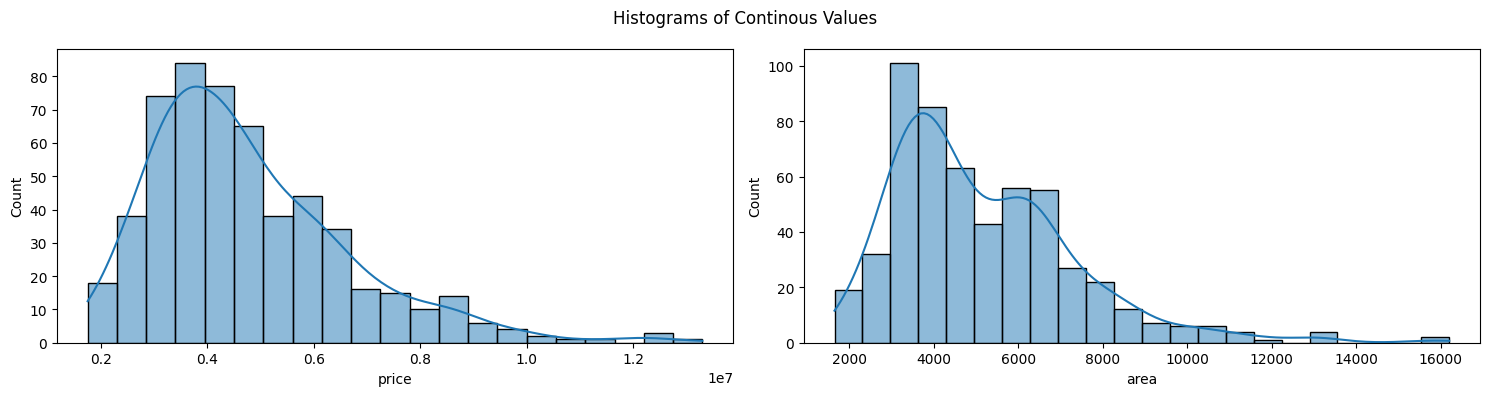

In [211]:
fig, axes = plt.subplots(1,2, figsize=(15,4))
cols = ["price","area"]
for ax, col in zip(axes, cols):
    sns.histplot(data=df, x=col, ax=ax, kde= True)

fig.suptitle("Histograms of Continous Values")
plt.tight_layout()

Both graphs show a right-skewed distribution, as the bulk of the data is on the left, with a long tail to the right

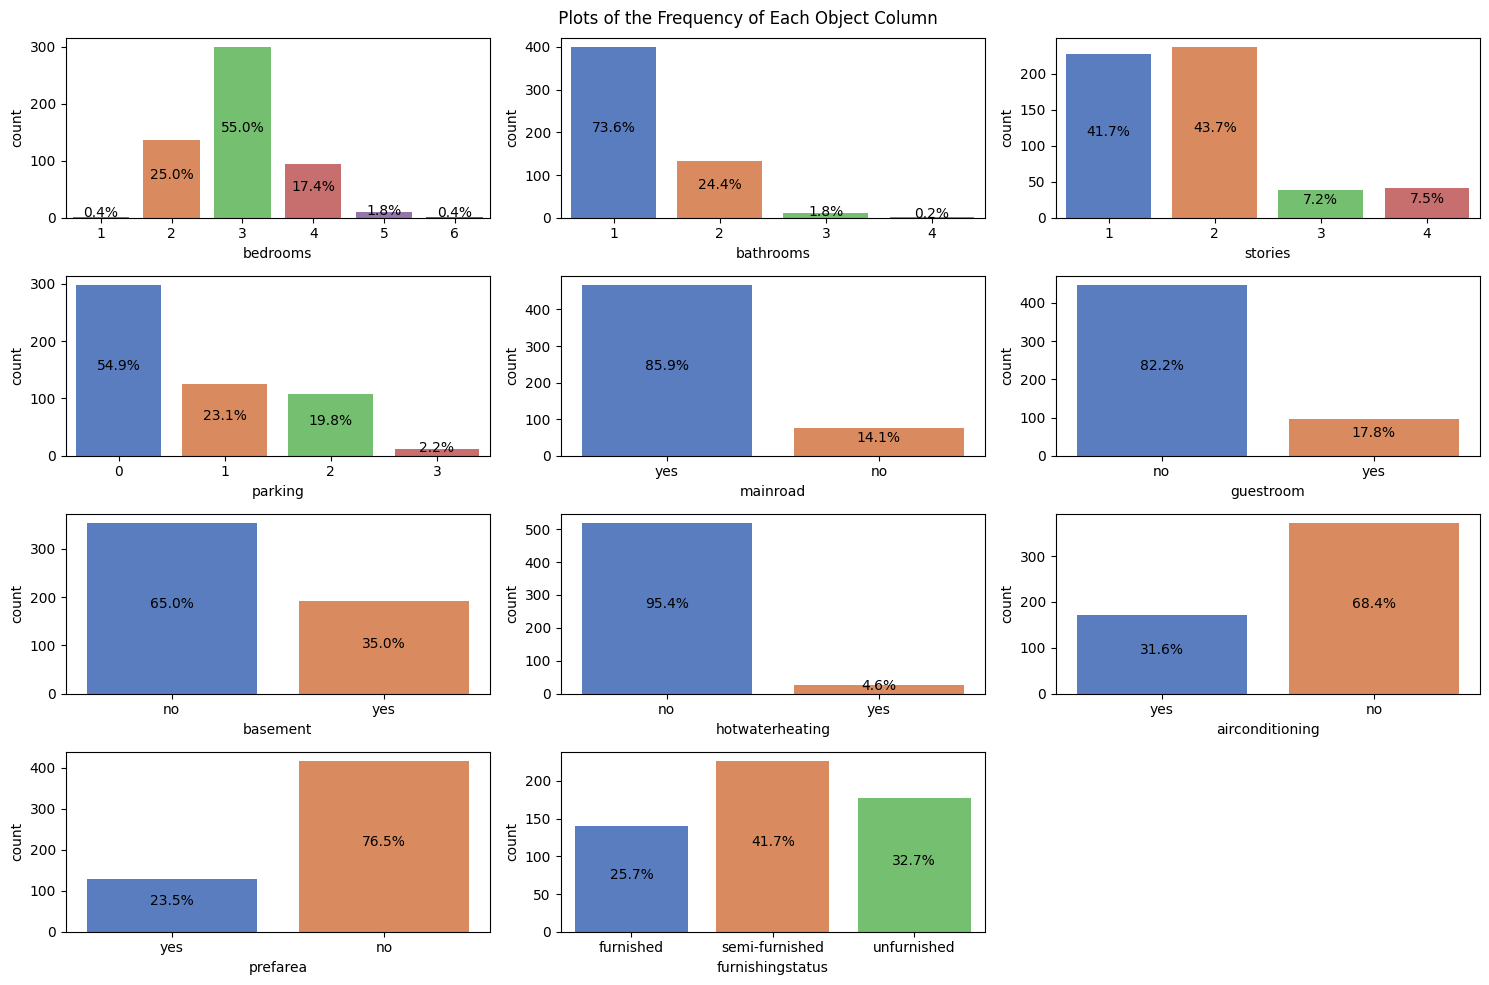

In [209]:
fig, axes = plt.subplots(len(disc_obj)//3 + int(len(disc_obj) % 3 > 0), 3, figsize=(15,10))
axes = axes.flatten()

for ax, col in zip(axes, disc_obj):
    sns.countplot(data = df, x=col, ax=ax, palette= "muted")
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height/total)*100
        ax.text(p.get_x() + p.get_width()/2, height/2, f"{percentage:.1f}%", ha="center")

for i in range(len(disc_obj), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle(" Plots of the Frequency of Each Object Column")
plt.tight_layout()

In [18]:
df_set1 = df.copy()

df_set1["bedrooms_binned"] = pd.cut(df_set1["bedrooms"], bins=[0,2,4,6], labels=["1_2", "3_4", "5_6"])
df_set1["bathrooms_binned"] = pd.cut(df_set1["bathrooms"], bins=[0,2,4], labels=["1_2","3_4"])
df_set1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedrooms_binned,bathrooms_binned
0,13300000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,3_4,1_2
1,12250000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,3_4,3_4
2,12250000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,3_4,1_2
3,12215000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,3_4,1_2
4,11410000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3_4,1_2


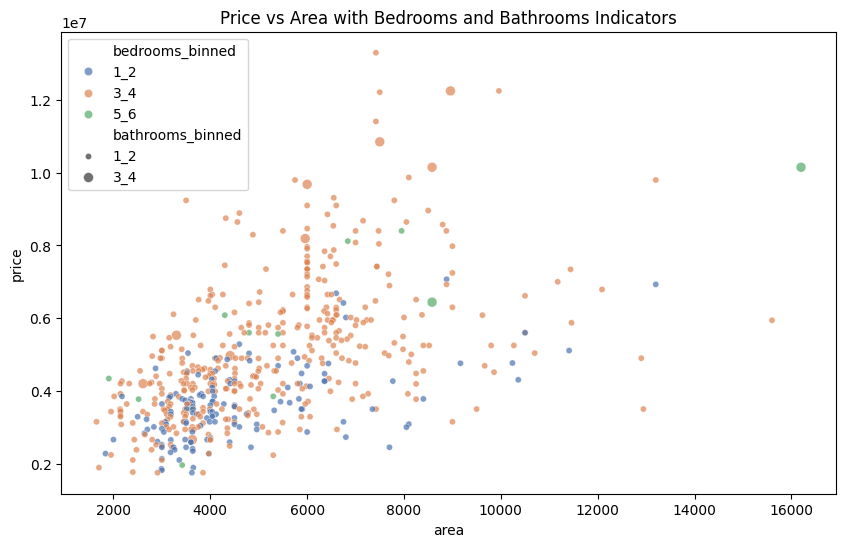

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_set1, x="area", y="price", hue="bedrooms_binned", size="bathrooms_binned",  
                sizes = {"1_2":20, "3_4":50}, palette="deep", alpha=0.7)
plt.title("Price vs Area with Bedrooms and Bathrooms Indicators")
plt.show()

There is a general positive correlation between price and area, meaning that as the area of a property increases, the price tends to rise. Properties with more bedrooms and bathrooms also generally have higher prices. The data points cluster toward the left, representing properties with lower prices and smaller areas.

The highest price, at $13 million, belongs to a house with an area of around 7,500 m², 3-4 bedrooms, and 1-2 bathrooms. In contrast, the largest property has an area of 16,000 m² and is priced at $11 million. This house features 5-6 bedrooms and 3-4 bathrooms, making it more spacious with additional features compared to the highest-priced property. However, factors like furnishing status and location might explain the price difference.

In [85]:
fig1 = px.scatter(df, x="area", y="price", color="stories", size_max=10,opacity =0.7,
                 hover_data=["parking", "prefarea", "basement", "furnishingstatus"])

fig2 = px.scatter(df, x="area", y="price", color="parking", size_max=10,opacity =0.7,
                 hover_data=["stories", "prefarea", "basement", "furnishingstatus"])

fig.add_traces(fig1.data)
fig.add_traces(fig2.data)

fig.update_layout(
    updatemenus=[{
        'buttons': [
                {
                    'label': 'Stories Color',
                    'method': 'update',
                    'args': [{'visible': [True, False]}]
                },
                {
                    'label': 'Furnishing Status Color',
                    'method': 'update',
                    'args': [{'visible': [False, True]}]
                }
            ],
            'direction': 'down',
            'showactive': True
        }]
)
fig.show()

The graph above includes stories and furnishing status as indicators, providing more detailed information.

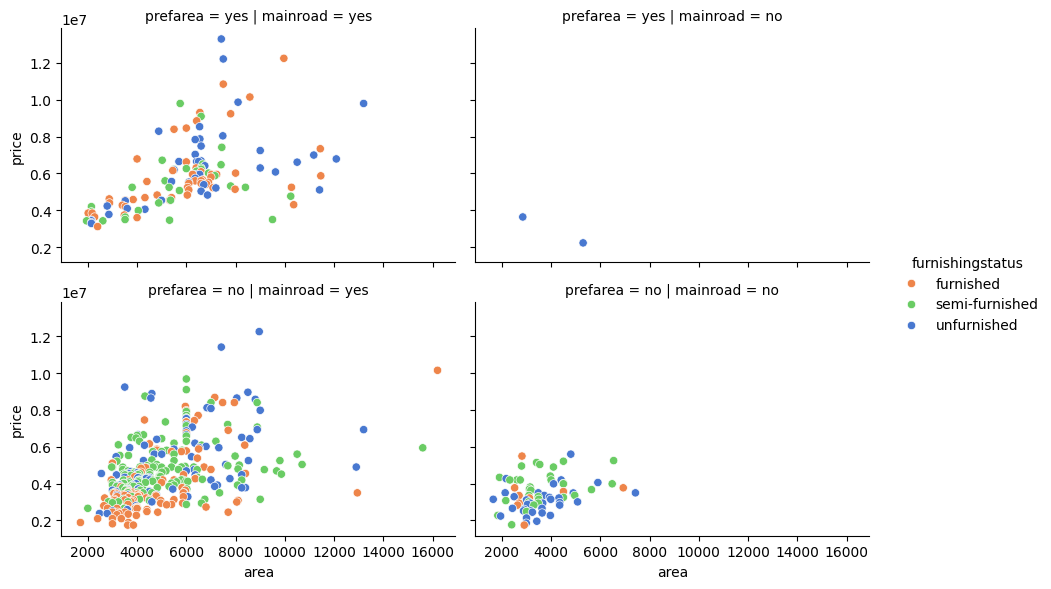

In [14]:
g = sns.FacetGrid(df, col="mainroad", row="prefarea", height=3, aspect=1.5)
g.map_dataframe(sns.scatterplot, x="area", y="price", hue="furnishingstatus", palette ="muted")
g.add_legend(title="furnishingstatus")
g.tight_layout()
plt.show()

In terms of strategic location, most houses prioritize being near the main road over being in a preferred area, with an even distribution across different furnishing statuses.

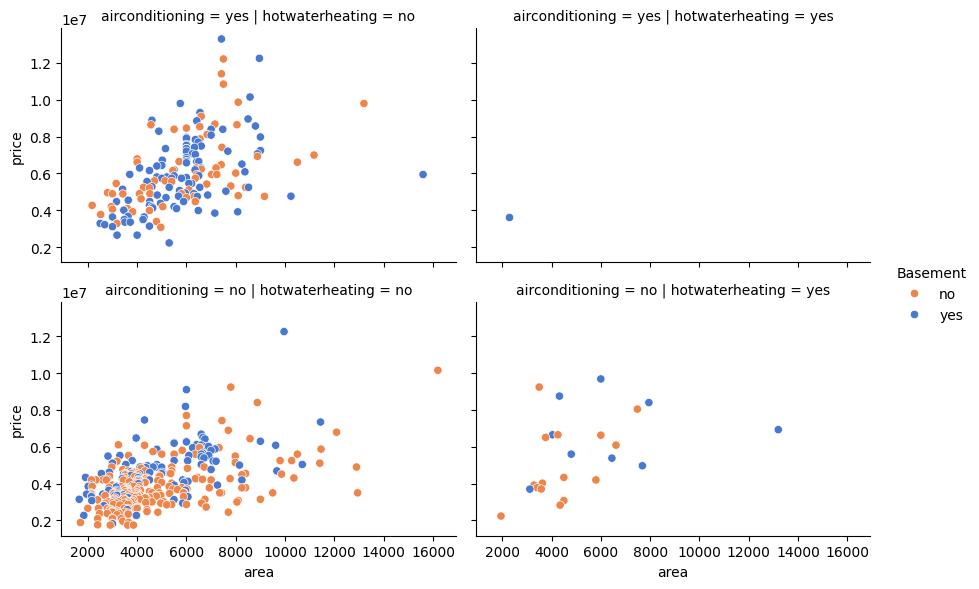

In [13]:
g = sns.FacetGrid(df, col="hotwaterheating", row="airconditioning", height=3,aspect=1.5)
g.map_dataframe(sns.scatterplot, x="area", y="price", hue="basement",  palette ="muted")
g.add_legend(title="Basement")
g.tight_layout()
plt.show()

In terms of facilities, the data mostly consists of properties with minimal amenities, lacking air conditioning, hot water heating, and a basement. Only one house is fully equipped with all facilities. In this dataset, air conditioning is more commonly found than hot water heating.

<Axes: xlabel='basement', ylabel='parking'>

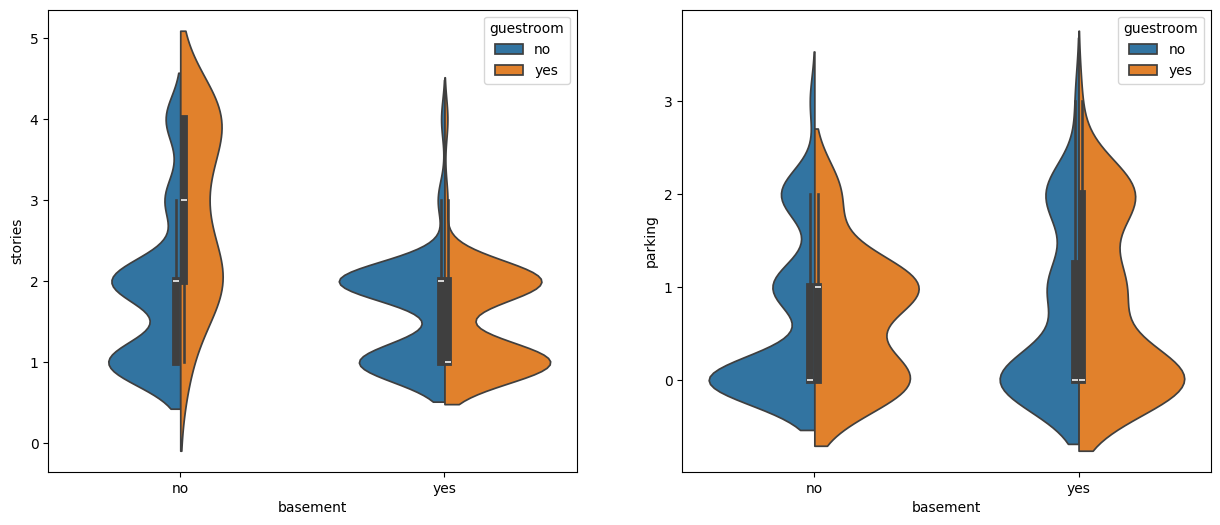

In [89]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.violinplot(data=df, x="basement", y="stories",hue="guestroom", split=True)

plt.subplot(1,2,2)
sns.violinplot(data=df, x="basement", y="parking",hue="guestroom", split=True)

In terms of stories, basements are more commonly found in houses with 1-2 stories, as are houses equipped with both a basement and a guestroom. In contrast, guestrooms are more evenly distributed across houses with varying numbers of stories.

Regarding parking, basements are more commonly found in houses with no parking or 1-2 parking spaces, with a notable prevalence in houses without any parking areas. Similarly, houses with both basements and guestrooms are more common among those with no parking or 1-2 parking spaces, while guestrooms are primarily distributed in houses with 0-2 parking areas.

# Summary

making a new column named luxury_house that meets certain specifications

In [100]:
df['luxury_house'] = (
    (df['bedrooms'] >= 3) & 
    (df['bathrooms'] >= 2) & 
    (df['stories'] >= 2) & 
    (df['parking'] >= 2) & 
    (df['area'] > 8000) 
).astype(int)

luxurious = df.loc[df["luxury_house"]==1]
print(f"there're {len(luxurious)} houses classified as luxurious")
print(f"the lowest price of luxurious house is {luxurious["price"].min()} and the highest price is {luxurious["price"].max()}")
luxurious

there're 9 houses classified as luxurious
the lowest price of luxurious house is 5250000.0 and the highest price is 12250000.0


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,luxury_house
1,12250000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1
2,12250000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1
6,10150000.0,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,1
17,8960000.0,8500,3,2,4,yes,no,no,no,yes,2,no,furnished,1
24,8575000.0,8800,3,2,2,yes,no,no,no,yes,2,no,furnished,1
37,7980000.0,9000,4,2,4,yes,no,no,no,yes,2,no,furnished,1
69,6790000.0,12090,4,2,2,yes,no,no,no,no,2,yes,furnished,1
89,6440000.0,8580,5,3,2,yes,no,no,no,no,2,no,furnished,1
175,5250000.0,9800,4,2,2,yes,yes,no,no,no,2,no,semi-furnished,1


Creating a new column named 'good_location' for houses located on the main road and in preferred areas

In [102]:
df['good_location'] = ((df['mainroad'] =="yes") & (df['prefarea'] >= "yes")).astype(int)
print(f"there're {len(df.loc[df["good_location"]==1])} houses are classified as good location")

there're 126 houses are classified as good location


Creating multiple DataFrames with indexes based on the classes of 'furnishingstatus' as the main indicator, paired with some prominent columns

In [115]:
furnished = df.loc[df['furnishingstatus'] == "furnished", ['price','area','luxury_house','good_location']].reset_index(drop=True)
print(f"there're {len(furnished)} furnished houses that are furnished")
print(f"the price starts from {furnished["price"].min()} to {furnished["price"].max()} with the mean of {furnished["price"].mean()}")
print(f"the range of the area starts from {furnished["area"].min()} to {furnished["area"].max()} with the mean of {furnished["area"].mean()}")
print(f"{furnished["luxury_house"].value_counts()},\n{furnished["good_location"].value_counts()}")

there're 140 furnished houses that are furnished
the price starts from 1750000.0 to 13300000.0 with the mean of 5495696.0
the range of the area starts from 2145 to 13200 with the mean of 5688.1
luxury_house
0    134
1      6
Name: count, dtype: int64,
good_location
0    97
1    43
Name: count, dtype: int64


In [116]:
semifurnished = df.loc[df['furnishingstatus'] == "semi-furnished", ['price','area','luxury_house','good_location']].reset_index(drop=True)
print(f"there're {len(semifurnished)} semifurnished houses that are semifurnished")
print(f"the price starts from {semifurnished["price"].min()} to {semifurnished["price"].max()} with the mean of {semifurnished["price"].mean()}")
print(f"the range of the area starts from {semifurnished["area"].min()} to {semifurnished["area"].max()} with the mean of {semifurnished["area"].mean()}")
print(f"{semifurnished["luxury_house"].value_counts()},\n{semifurnished["good_location"].value_counts()}")

there're 227 semifurnished houses that are semifurnished
the price starts from 1767150.0 to 12250000.0 with the mean of 4908171.630931287
the range of the area starts from 1836 to 15600 with the mean of 5166.339207048458
luxury_house
0    224
1      3
Name: count, dtype: int64,
good_location
0    175
1     52
Name: count, dtype: int64


In [117]:
unfurnished = df.loc[df['furnishingstatus'] == "unfurnished", ['price','area','luxury_house','good_location']].reset_index(drop=True)
print(f"there're {len(unfurnished)} unfurnished houses that are unfurnished")
print(f"the price starts from {unfurnished["price"].min()} to {unfurnished["price"].max()} with the mean of {unfurnished["price"].mean()}")
print(f"the range of the area starts from {unfurnished["area"].min()} to {unfurnished["area"].max()} with the mean of {unfurnished["area"].mean()}")
print(f"{unfurnished["luxury_house"].value_counts()},\n{unfurnished["good_location"].value_counts()}")

there're 178 unfurnished houses that are unfurnished
the price starts from 1750000.0 to 10150000.0 with the mean of 4013713.0361955306
the range of the area starts from 1650 to 16200 with the mean of 4707.595505617977
luxury_house
0    178
Name: count, dtype: int64,
good_location
0    147
1     31
Name: count, dtype: int64


In [122]:
df.groupby(['furnishingstatus','good_location'])['price'].mean().reset_index(name="mean_price")

,furnishingstatus,good_location,mean_price
0,furnished,0,5.121072e+06
1,furnished,1,6.340779e+06
2,semi-furnished,0,4.615758e+06
3,semi-furnished,1,5.892257e+06
4,unfurnished,0,3.720000e+06
5,unfurnished,1,5.406483e+06


The more furnished and well-located a house is, the higher the price tends to be

Creating new columns named 'price_level' and 'area_level' to categorize data into levels with equal distribution for each category

In [126]:
category = ["low","moderate_low","moderate_high","high"]
df["price_level"] = pd.cut(df["price"], bins=4, labels=category, include_lowest=True)
df["area_level"] = pd.cut(df["area"], bins=4, labels=category, include_lowest=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,luxury_house,good_location,price_level,area_level
0,13300000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,1,high,moderate_low
1,12250000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,high,moderate_high
2,12250000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,1,high,moderate_high
3,12215000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0,1,high,moderate_low
4,11410000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0,0,high,moderate_low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0,0,low,low
541,1767150.0,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0,0,low,low
542,1750000.0,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0,0,low,low
543,1750000.0,2910,3,1,1,no,no,no,no,no,0,no,furnished,0,0,low,low


In [127]:
df.groupby(['furnishingstatus','area_level'])['price'].mean().reset_index(name="mean_price")

,furnishingstatus,area_level,mean_price
0,furnished,low,4.328638e+06
1,furnished,moderate_low,6.365602e+06
2,furnished,moderate_high,7.263667e+06
3,furnished,high,7.210000e+06
4,semi-furnished,low,4.286816e+06
5,semi-furnished,moderate_low,5.805493e+06
6,semi-furnished,moderate_high,5.663538e+06
7,semi-furnished,high,5.943000e+06
8,unfurnished,low,3.312721e+06
9,unfurnished,moderate_low,5.462916e+06


The level of furnishing and the spaciousness of the area do not significantly impact the price, as seen with semi-furnished houses. This is likely due to other factors, such as the location and the availability of additional facilities

In [128]:
df.groupby(['furnishingstatus','area_level','good_location'])['price'].mean().reset_index(name="mean_price")

,furnishingstatus,area_level,good_location,mean_price
0,furnished,low,0,4.339222e+06
1,furnished,low,1,4.276682e+06
2,furnished,moderate_low,0,5.906819e+06
3,furnished,moderate_low,1,7.111125e+06
4,furnished,moderate_high,0,1.011500e+07
5,furnished,moderate_high,1,6.449000e+06
6,furnished,high,0,5.915000e+06
7,furnished,high,1,9.800000e+06
8,semi-furnished,low,0,4.272031e+06
9,semi-furnished,low,1,4.394928e+06


In [130]:
df["stories_binned"] = pd.cut(df["stories"], bins=[0,2,4], labels=["1_2", "3_4"])
df.groupby(['furnishingstatus','area_level','stories_binned'])['price'].mean().reset_index(name="mean_price")

,furnishingstatus,area_level,stories_binned,mean_price
0,furnished,low,1_2,4.310873e+06
1,furnished,low,3_4,4.503333e+06
2,furnished,moderate_low,1_2,5.907349e+06
3,furnished,moderate_low,3_4,7.350847e+06
4,furnished,moderate_high,1_2,6.316333e+06
5,furnished,moderate_high,3_4,9.158333e+06
6,furnished,high,1_2,7.210000e+06
7,furnished,high,3_4,NaN
8,semi-furnished,low,1_2,4.210529e+06
9,semi-furnished,low,3_4,5.056042e+06


This makes more sense when paired with the number of stories, as all factors align more perfectly together

Below is a pivot table aggregating several columns. For numeric columns, it shows both the mode and mean, while for categorical columns, it displays the mode

In [121]:
def round_mean(df):
    return round(np.mean(df),2)
def mode(df):
    return df.mode()[0]

pivot = pd.pivot_table(df, index=["furnishingstatus"],
                         aggfunc={'bedrooms': [mode, round_mean],'bathrooms': [mode, round_mean],
                                   'stories': [mode, round_mean],'parking': [mode, round_mean],
                                   'mainroad': [mode],'guestroom': [mode],'basement': [mode],
                                   'hotwaterheating': [mode],'airconditioning': [mode],'parking': [mode],
                                   'luxury_house': [mode],'good_location': [mode]
                         })
pivot

airconditioning basement bathrooms            bedrooms  \
                            mode     mode      mode round_mean     mode   
furnishingstatus                                                          
furnished                     no       no         1       1.38        3   
semi-furnished                no       no         1       1.30        3   
unfurnished                   no       no         1       1.19        3   

                            good_location guestroom hotwaterheating  \
                 round_mean          mode      mode            mode   
furnishingstatus                                                      
furnished              3.06             0        no              no   
semi-furnished         3.01             0        no              no   
unfurnished            2.83             0        no              no   

                 luxury_house mainroad parking stories             
                         mode     mode    mode    mode round_mean  
furnishingstatus                                                   
furnished                   0      yes       0       2       1.94  
semi-furnished              0      yes       0       2       1.80  
unfurnished                 0      yes       0       1       1.70